In [3]:
%load_ext autoreload
%autoreload 2
from RTKToArrayConversion import *
from ExtendedConeBeamDCC import *
from AllAcquisitionCDClass import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
filesdir_ref = "/home/mmouchet/PycharmProjects/4D_study/bpm_12/"
# reading projections
proj = itk.imread(filesdir_ref+"projections_bpm12.mha")
# Reading the geometry of the scanner
xmlreader = rtk.ThreeDCircularProjectionGeometryXMLFileReader.New()
xmlreader.SetFilename(filesdir_ref+'geometry_bpm12.xml')
# xmlreader.SetFilename(filesdir_ref+"geometry.xml")
xmlreader.GenerateOutputInformation()
geometry = xmlreader.GetOutputObject()
print('nproj = %d'%(len(geometry.GetGantryAngles())))
print(proj.GetLargestPossibleRegion().GetSize())

nproj = 1200
itkSize3 ([920, 32, 1200])


In [6]:
geometry_array = RTKtoNP(geometry)
proj_array = itk.GetArrayFromImage(proj)
proj_infos = GetProjectionInformations(proj)
source_pos_array = GetSourcePositions(geometry)
rotation_matrices_array = GetRotationMatrices(geometry)
fixed_matrices_array = GetFixedSystemMatrices(geometry)
print(proj_infos)

AcquiDCC = DCCOnCDinAnAcquisition(geometry_array, source_pos_array, rotation_matrices_array, fixed_matrices_array, proj_array, proj_infos)

[array([1.028, 1.095, 1.   ]), array([-472.366 ,  -16.9725, -599.5   ]), array([ 920,   32, 1200]), array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])]


In [9]:
AcquiDCC.ComputeAllPossiblePairs()


708354
370638


0

In [11]:
# Fonction non parallélisée 
# AcquiDCC.ComputeDCCForAllPairs()

AcquiDCC.ComputeDCCForAllPairsPara()
#AcquiDCC.pairs

AttributeError: 'ProjectionsPair' object has no attribute 'idx0'

In [6]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from(range(AcquiDCC.n_proj))
G.add_weighted_edges_from(AcquiDCC.pairs)
print(G.number_of_nodes(), G.number_of_edges())
length, path = nx.single_source_dijkstra(G, 0)

1200 369417


<IPython.core.display.Javascript object>


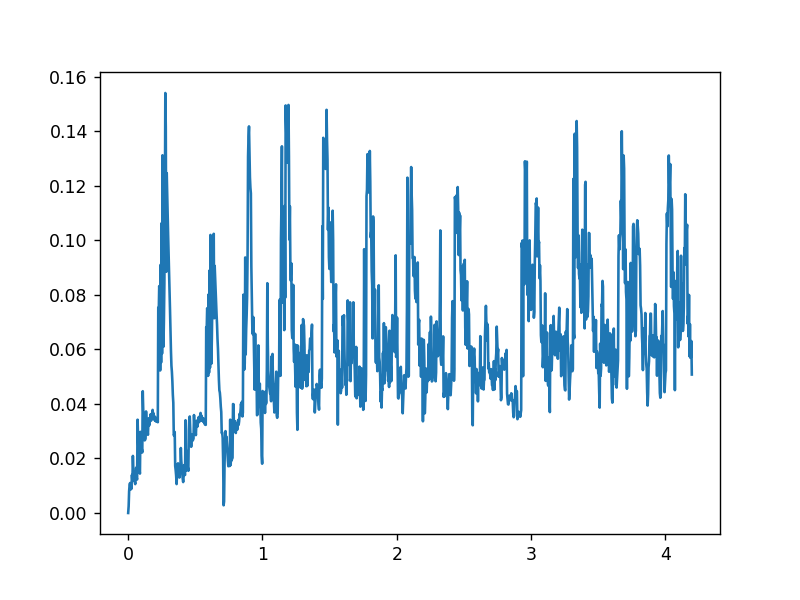

In [10]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.figure()
plt.plot(np.arange(AcquiDCC.n_proj)*0.35/100,[length[i] for i in range(AcquiDCC.n_proj)])
plt.show()

0.08731390347894202